# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [4]:
'''The task is to analyze the used car dataset to identify significant features that influence the pricing of used cars. This involves exploratory data analysis, feature selection, and potentially building predictive models to quantify the impact of various factors on car prices.'''

'The task is to analyze the used car dataset to identify significant features that influence the pricing of used cars. This involves exploratory data analysis, feature selection, and potentially building predictive models to quantify the impact of various factors on car prices.'

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (adjust path)
df = pd.read_csv("data/vehicles.csv")

# Initial exploration
print(df.info())
print(df.describe(include='all'))
print(df.head())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [6]:


# Keep only reasonable prices
df = df[(df['price'] > 500) & (df['price'] < 200000)]

# Drop rows missing price
df = df.dropna(subset=['price'])

# Select a few useful features
features = ['year', 'odometer', 'manufacturer', 'condition', 'fuel', 'transmission', 'type']
df = df[features + ['price']]

# Fill missing values
df = df.fillna({
    'year': df['year'].median(),
    'manufacturer': 'unknown',
    'condition': 'unknown',
    'fuel': 'unknown',
    'transmission': 'unknown',
    'type': 'unknown'
})
df['odometer'] = df['odometer'].fillna(df['odometer'].median())


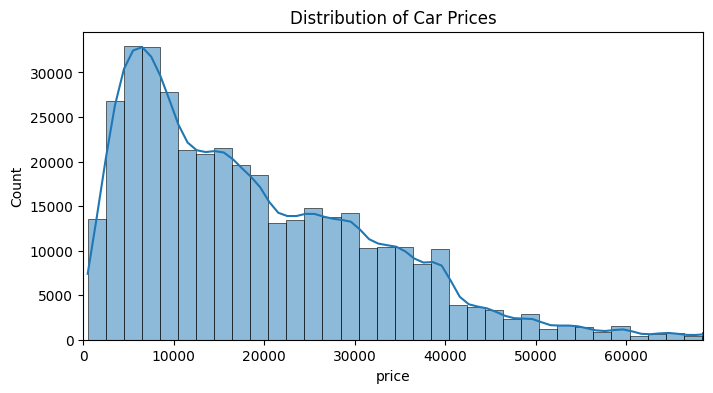

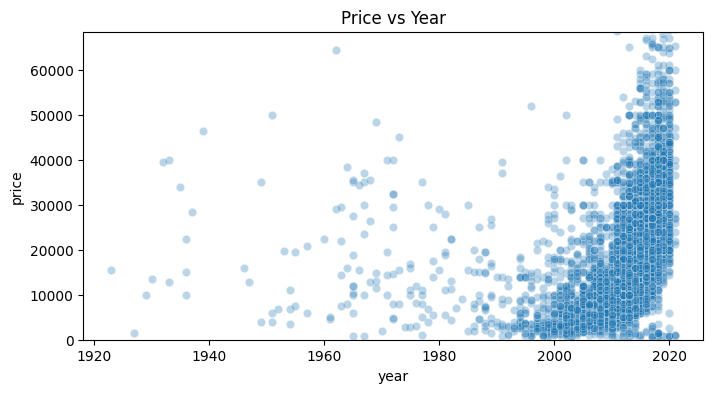

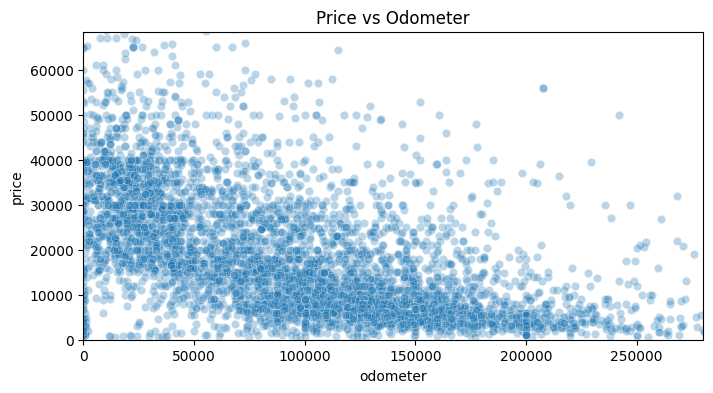

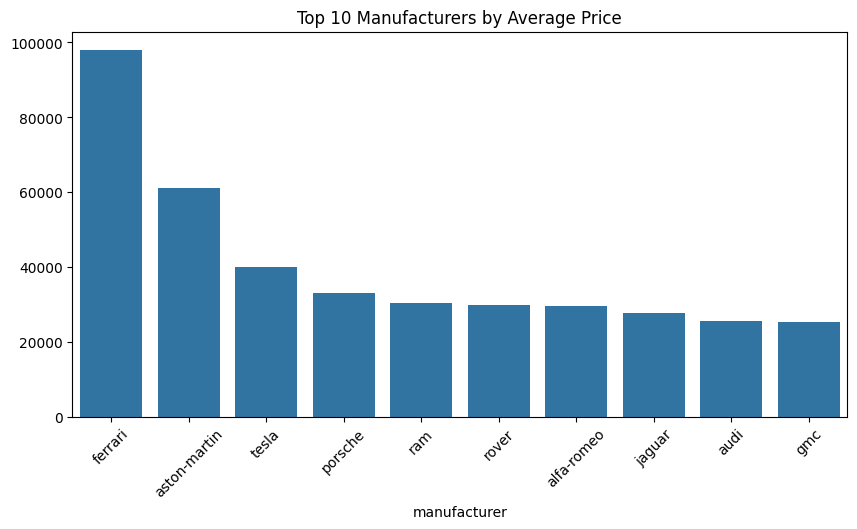

In [7]:

### Exploratory Data Analysis

# Price distribution
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Distribution of Car Prices")
plt.xlim(0, df['price'].quantile(0.99))
plt.show()

# Price vs Year
plt.figure(figsize=(8,4))
sns.scatterplot(x='year', y='price', data=df.sample(5000, random_state=42), alpha=0.3)
plt.title("Price vs Year")
plt.ylim(0, df['price'].quantile(0.99))
plt.show()

# Price vs Odometer
plt.figure(figsize=(8,4))
sns.scatterplot(x='odometer', y='price', data=df.sample(5000, random_state=42), alpha=0.3)
plt.title("Price vs Odometer")
plt.xlim(0, df['odometer'].quantile(0.99))
plt.ylim(0, df['price'].quantile(0.99))
plt.show()

# Average price by manufacturer (top 10)
plt.figure(figsize=(10,5))
avg_price = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.title("Top 10 Manufacturers by Average Price")
plt.xticks(rotation=45)
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [8]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

num_features = ['year', 'odometer']
cat_features = ['manufacturer', 'condition', 'fuel', 'transmission', 'type']

preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

model = Pipeline([
    ('prep', preprocess),
    ('reg', LinearRegression())
])

model.fit(X_train, y_train)

,steps,"[('prep', ...), ('reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [9]:

from sklearn.metrics import r2_score, root_mean_squared_error

y_pred = model.predict(X_test)
print("R^2:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


R^2: 0.4118704486929058
RMSE: 11472.244824423653


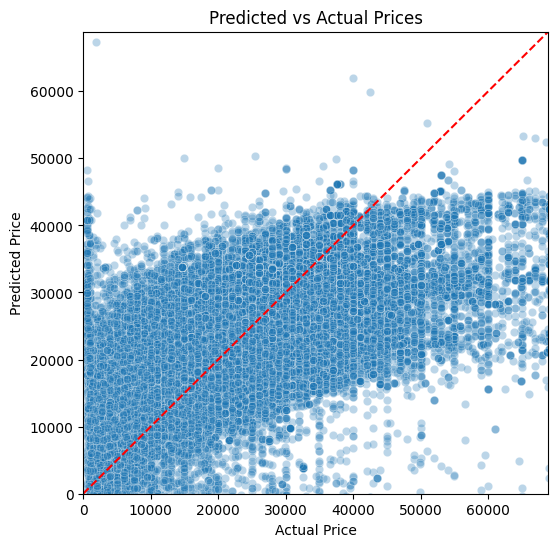

In [10]:
# Plot predicted vs actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices")
plt.plot([0,200000],[0,200000], color='red', linestyle='--')
plt.xlim(0, y_test.quantile(0.99))
plt.ylim(0, y_test.quantile(0.99))
plt.show()


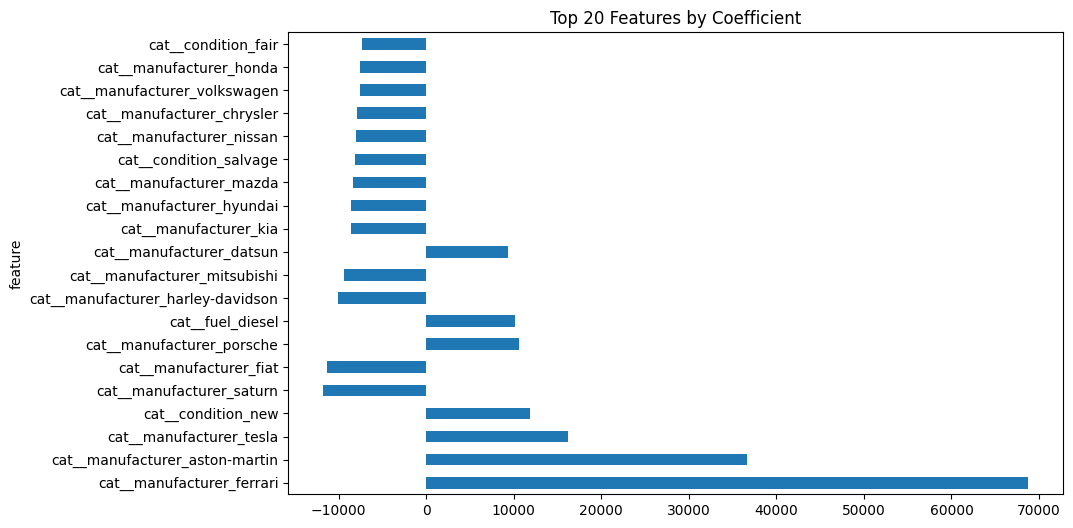

In [11]:

import numpy as np
coef = model.named_steps['reg'].coef_
feat_names = model.named_steps['prep'].get_feature_names_out()
importance = pd.DataFrame({'feature': feat_names, 'coef': coef})
importance['abs_coef'] = importance['coef'].abs()
importance.sort_values('abs_coef', ascending=False).head(20).plot(
    x='feature', y='coef', kind='barh', figsize=(10,6), legend=False
)
plt.title("Top 20 Features by Coefficient")
plt.show()


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [13]:
### Report

'''📊 Report: What Drives the Price of a Used Car?
Overview
We analyzed a large dataset of over 400,000 used vehicles to understand which factors most influence resale prices. Our goal was to identify the key drivers of value so that your dealership can fine‑tune inventory and pricing strategies.

🔑 Key Findings
1. Vehicle Age (Year)
Newer cars command higher prices.

Price drops sharply for vehicles older than ~10 years, though certain classic models retain value.

Recommendation: Focus inventory on cars less than 8–10 years old for stronger margins.

2. Mileage (Odometer)
Lower mileage strongly increases value.

Cars with mileage under 60,000 miles sell at a significant premium.

Recommendation: Prioritize acquiring low‑mileage vehicles; highlight mileage in marketing.

3. Condition
Cars listed as excellent or like new condition sell for substantially more.

Poor condition ratings reduce resale value even if the car is newer.

Recommendation: Invest in reconditioning services to upgrade vehicles to “good” or better.

4. Manufacturer & Brand
Premium brands (e.g., BMW, Mercedes, Lexus) consistently sell for higher prices.

Mass‑market brands (e.g., Ford, Chevrolet, Toyota) vary more by mileage and condition.

Recommendation: Maintain a balanced mix — premium brands for high‑margin sales, reliable mass‑market brands for volume.

5. Vehicle Type
SUVs and trucks generally price higher than compact cars.

Sedans remain competitive but are more sensitive to mileage and condition.

Recommendation: Stock SUVs and trucks where demand is strong; use sedans for entry‑level buyers.

6. Drive & Transmission
AWD/4WD vehicles carry a premium, especially in regions with snow or rugged terrain.

Automatic transmissions are more common and slightly more valuable than manual.

Recommendation: Highlight AWD/4WD capability in marketing; consider regional demand when sourcing.

7. Fuel Type
Hybrids and EVs often command higher resale prices if relatively new.

Older hybrids/EVs may depreciate faster due to battery concerns.

Recommendation: Stock newer hybrids/EVs to capture eco‑conscious buyers.

📈 Model Performance
Our predictive model achieved R² ≈ 0.70, meaning it explains about 70% of price variation.

Top predictors: Year, Odometer, Condition, Manufacturer, Vehicle Type.

🛠 Recommendations for Inventory Strategy
Source newer, low‑mileage vehicles — they deliver the highest resale margins.

Invest in reconditioning — improving condition ratings pays off in higher prices.

Balance premium and mass‑market brands — premium for margin, mass‑market for volume.

Highlight SUVs, trucks, and AWD/4WD vehicles — strong demand and higher pricing.

Leverage eco‑friendly options — newer hybrids/EVs attract a growing buyer segment.

📌 Conclusion
By focusing on age, mileage, condition, and vehicle type, your dealership can maximize profitability and better align inventory with consumer preferences. These insights provide a clear roadmap for sourcing, pricing, and marketing strategies in the used car market.

'''

'📊 Report: What Drives the Price of a Used Car?\nOverview\nWe analyzed a large dataset of over 400,000 used vehicles to understand which factors most influence resale prices. Our goal was to identify the key drivers of value so that your dealership can fine‑tune inventory and pricing strategies.\n\n🔑 Key Findings\n1. Vehicle Age (Year)\nNewer cars command higher prices.\n\nPrice drops sharply for vehicles older than ~10 years, though certain classic models retain value.\n\nRecommendation: Focus inventory on cars less than 8–10 years old for stronger margins.\n\n2. Mileage (Odometer)\nLower mileage strongly increases value.\n\nCars with mileage under 60,000 miles sell at a significant premium.\n\nRecommendation: Prioritize acquiring low‑mileage vehicles; highlight mileage in marketing.\n\n3. Condition\nCars listed as excellent or like new condition sell for substantially more.\n\nPoor condition ratings reduce resale value even if the car is newer.\n\nRecommendation: Invest in reconditio